### 디지털 신호 처리 중간고사  

#### 컴퓨터과학과 201911006 임지민 

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import thinkdsp
import thinkplot
import matplotlib.pylab as plt
import numpy as np

### 1. perfect_pitch.wav를 read하고 소리를 들어보세요.

In [3]:
wave = thinkdsp.read_wave("perfect_pitch.wav")
wave.normalize()
wave.apodize()
wave.make_audio()

### 2. perfect_pitch.wav의 framerate은?

In [4]:
thinkdsp.read_wave('perfect_pitch.wav').framerate

48000

위 코드를 통해 이 file의 framerate는 48000임을 알 수 있다.

### 3. perfect_pitch.wav에서는 몇 개의 음계가 포함되어 있는가?

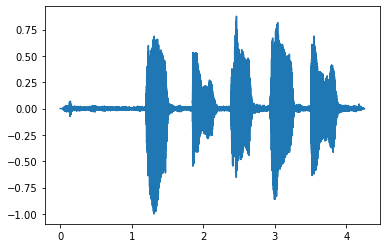

In [5]:
wave.plot()

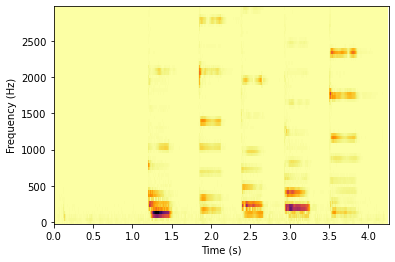

In [6]:
spectrogram = wave.make_spectrogram(seg_length=1024)
spectrogram.plot(3000)
thinkplot.config(xlabel='Time (s)', 
                 ylabel='Frequency (Hz)',
                 xlim=[wave.start, wave.end])

시간의 흐름에 따라 주파수를 알 수 있는 spectrogram을 이용해 몇 개의 음계가 들어가있는지 알 수 있다.  
위의 경우 1.2 ~ 1.5초 / 1.8 ~ 2.1초 / 2.3 ~ 2.6초 / 3.0 ~  3.3초 / 3.6 ~ 4.0초 에 5개의 음계가 포함되어 있음을 확인할 수 있다.

### 4. spectrum 분석을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

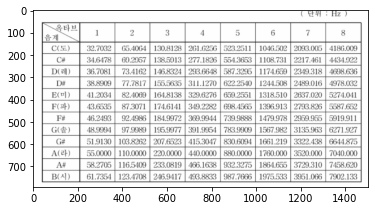

In [7]:
from skimage.io import imread

img = imread('scale.png')
plt.imshow(img)
plt.show()

음을 찾기 위해 3번을 참고해 구간을 나눠, 구간 별로 spectrum을 살펴봐야 한다.  
spectrum의 구간은 1.2 ~ 1.5초 / 1.8 ~ 2.1초 / 2.3 ~ 2.6초 / 3.0 ~  3.3초 / 3.6 ~ 4.0초로 나눠서 살펴본다.

**(1) 첫 번째 음계**

In [8]:
start = 1.2
duration = 0.3
segment = wave.segment(start,duration)
segment.make_audio()

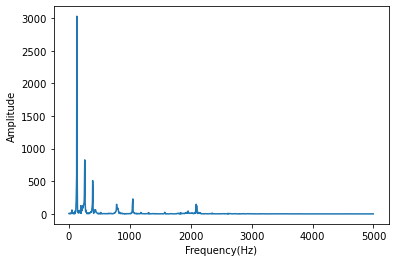

In [9]:
spectrum = segment.make_spectrum()
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

정확히 살펴보기 위해서 frequency를 1000Hz까지만 잘라서 살펴보면, fundamental frequency의 정수배로 스펙트럼이 나타나는 것을 확인할 수 있다.

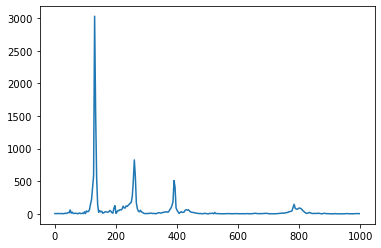

In [10]:
spectrum.plot(1000)

In [11]:
spectrum.peaks()[:10]

[(3027.446701345115, 130.0),
 (1542.8671411658668, 133.33333333333334),
 (827.0779620981218, 260.0),
 (586.7237080963873, 126.66666666666667),
 (572.4084251949181, 263.33333333333337),
 (545.4863453456138, 136.66666666666669),
 (510.758088526277, 390.0),
 (504.07198883210077, 256.6666666666667),
 (409.78851937800647, 393.33333333333337),
 (400.845638599545, 123.33333333333334)]

spectrum.peaks()함수를 이용하면 Amplitude와 Frequency를 내림차순으로 알 수 있다.  
이 함수를 사용하면 위와 같은 결과가 나오는데, 이를 통해서 dominant frequency는 130Hz임을 알 수 있다.  
또한 spectrum과 아래 결과를 통해서 130Hz가 fundamental frequency임을 알 수 있고, 이는 C3이므로 첫 번째 음계는 도라는 것을 알 수 있다.

**(2) 두 번째 음계**

In [12]:
start = 1.8
duration = 0.3
segment = wave.segment(start,duration)
segment.make_audio()

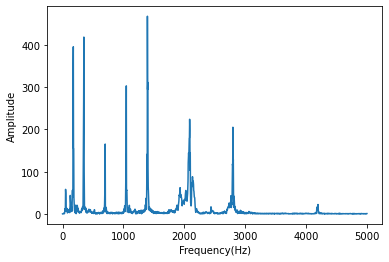

In [13]:
spectrum = segment.make_spectrum()
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

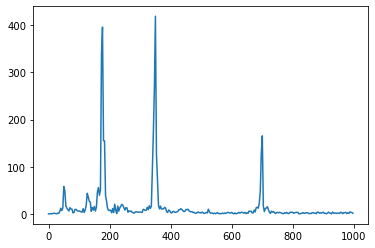

In [14]:
spectrum.plot(1000)

In [15]:
spectrum.peaks()[:10]

[(468.2594571237113, 1393.3333333333335),
 (418.9041204054405, 350.0),
 (395.9115863617663, 176.66666666666669),
 (337.1146601802533, 173.33333333333334),
 (311.4957493976723, 1400.0),
 (303.2762280453049, 1046.6666666666667),
 (294.8220231827632, 1396.6666666666667),
 (269.4826799884601, 346.6666666666667),
 (224.18084988350353, 2086.666666666667),
 (205.30887518402437, 2796.666666666667)]

dominant frequency는 1393.3Hz이며 fundamental frequency또한 176.6Hz임을 확인할 수 있다. 176.6Hz는 F3이며 즉, 음계는 파라는 것을 알 수 있다.

주파수들은 fundamental frequency의 배수를 이루게 되지만 위의 경우, 175Hz 이하에서도 peak이 발견되어서 자세히 분석하고자 100Hz 이하로 자르고 peak을 살펴보았다.   
이 주파수는 약 50Hz로, 위에서 살펴본 주파수인 1393Hz,176Hz와는 배수 관계와는 멀기 때문에 주변 소음이라고 예상할 수 있다.

[(58.185449498095586, 50.0),
 (49.035208061602674, 53.333333333333336),
 (17.46288391914982, 56.66666666666667),
 (13.309696245968656, 70.0),
 (12.266330776658883, 60.0),
 (12.16109735813749, 40.0),
 (11.907050849483886, 46.66666666666667),
 (10.430566674051569, 76.66666666666667),
 (10.370422047610468, 73.33333333333334),
 (9.71371058634396, 90.0)]

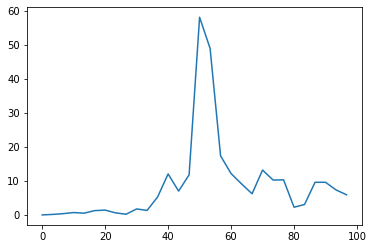

In [16]:
spectrum.low_pass(100)
spectrum.plot(100)
spectrum.peaks()[:10]

**(3) 세 번째 음계**

In [17]:
start = 2.3
duration = 0.3
segment = wave.segment(start,duration)
segment.make_audio()

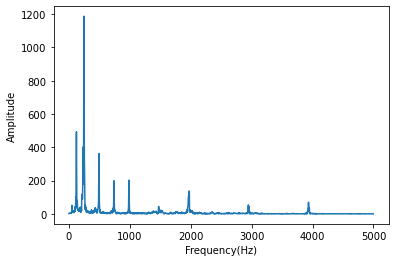

In [18]:
spectrum = segment.make_spectrum()
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

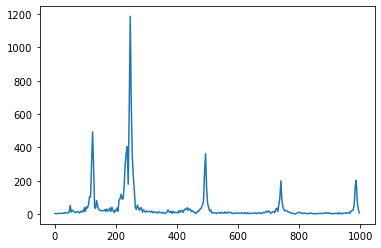

In [19]:
spectrum.plot(1000)

In [20]:
spectrum.peaks()[:10]

[(1186.8238637059594, 246.66666666666669),
 (666.7578399223571, 250.0),
 (638.5352458283007, 243.33333333333334),
 (492.97909992395444, 123.33333333333334),
 (403.78602510312726, 236.66666666666669),
 (366.23592387035046, 233.33333333333334),
 (362.1108868919935, 493.33333333333337),
 (345.829655354866, 253.33333333333334),
 (297.15646195026915, 230.0),
 (289.3001038397393, 120.0)]

dominant frequency는 246.6Hz이고, fundamental frequency는 123.3Hz이다. 123.3Hz는 B2로, 시라는 것을 알 수 있다.

**(4) 네 번째 음계**

In [21]:
start = 3.0
duration = 0.3
segment = wave.segment(start,duration)
segment.make_audio()

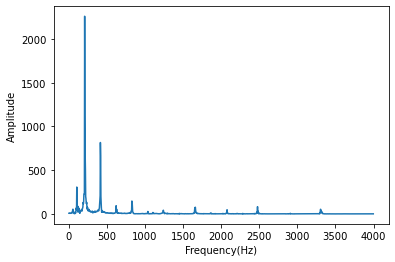

In [22]:
spectrum = segment.make_spectrum()
spectrum.plot(4000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

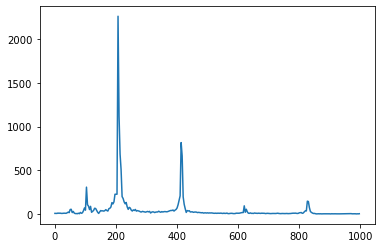

In [23]:
spectrum.plot(1000)

In [24]:
spectrum.peaks()[:10]

[(2260.085761372003, 206.66666666666669),
 (1117.089760406729, 210.0),
 (816.3227985161992, 413.33333333333337),
 (686.3167112134295, 213.33333333333334),
 (662.9115768153772, 416.6666666666667),
 (507.41308221396844, 216.66666666666669),
 (307.1885932260433, 103.33333333333334),
 (226.48446772443893, 203.33333333333334),
 (225.92749101257047, 200.0),
 (225.90995432870477, 196.66666666666669)]

dominant frequency는 206.6Hz이고 fundamental frequency는 103.3Hz이므로 103.3Hz는 G#2이므로 솔#임을 알 수 있다.

**(5) 다섯 번째 음계**

In [25]:
start = 3.6
duration = 0.4
segment = wave.segment(start,duration)
segment.make_audio()

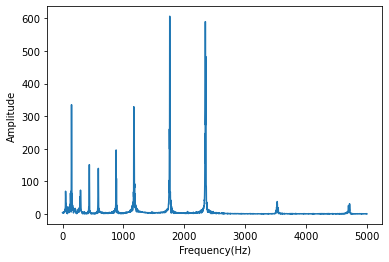

In [26]:
spectrum = segment.make_spectrum()
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

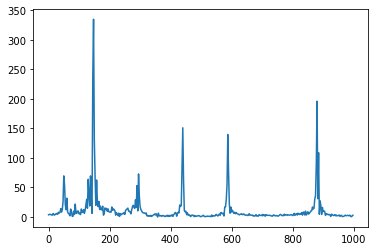

In [27]:
spectrum.plot(1000)

In [28]:
spectrum.peaks()[:10]

[(606.4892005434357, 1760.0),
 (589.9261726224934, 2345.0),
 (482.5762113948735, 2352.5),
 (391.677038753302, 2355.0),
 (335.07787462855805, 147.5),
 (328.87689881954134, 1170.0),
 (327.9357592650357, 1762.5),
 (321.0723865041601, 2350.0),
 (276.7966479407229, 1172.5),
 (272.76728653516705, 2347.5)]

dominant frequency는 1760Hz이고, fundamental frequency는 147.5Hz이다. 147.5Hz는 D3이며, 이를 통해 음계가 레라는 것을 알 수 있다.

[(69.59637297693584, 50.0),
 (53.60862553288012, 52.5),
 (31.876491960178264, 60.0),
 (25.59333323310074, 47.5),
 (21.822169386002027, 87.5),
 (20.431002709842854, 55.0),
 (14.152494639388506, 40.0),
 (13.383599173641496, 72.5),
 (12.271335921444038, 45.0),
 (12.255510457518549, 57.5)]

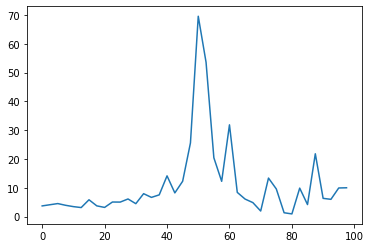

In [29]:
spectrum.low_pass(100)
spectrum.plot(100)
spectrum.peaks()[:10]

146Hz이하에서도 frequency를 발견할 수 있는데, 이를 파악하고자 100Hz이하로 잘라보았다.  
peak는 50Hz부근이며, 직전에 살펴보았던 주파수들과 비교해 보았을때 배수 관계와 거리가 멀기에 이 주파수는 소음으로 예상된다.

### 5. autocorrelation을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

In [30]:
from autocorr import autocorr

In [31]:
def estimate_fundamental(segment, low, high):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

**(1) 첫 번째 음계**

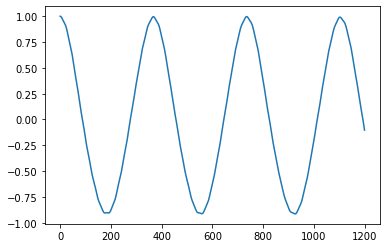

In [32]:
duration = 0.05
segment = wave.segment(start=1.3, duration=duration)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
plt.show()

estimate_fundamental함수에 low, high를 지정해줘서 peak인 부분을 알아낸다.  
아래의 경우 peak 부근인 low=300, high=400로 지정해주었다.

In [33]:
freq = estimate_fundamental(segment,300,400)
freq

130.7901907356948

130Hz는 C3이므로 도라는 것을 알 수 있다.

**(2) 두 번째 음계**

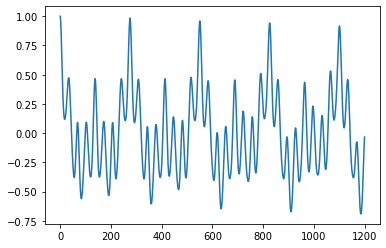

In [34]:
duration = 0.05
segment = wave.segment(start=1.9, duration=duration)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
plt.show()

In [35]:
freq = estimate_fundamental(segment,250,300)
freq

174.54545454545456

peak 부근인 low=250, high=300로 지정해서 값을 얻어낸다. 위의 경우, 174Hz는 F3에 해당하므로 파라는 것을 알 수 있다. 

**(3) 세 번째 음계**

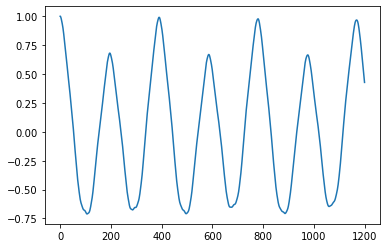

In [36]:
duration = 0.05
segment = wave.segment(start=2.5, duration=duration)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
plt.show()

In [37]:
freq = estimate_fundamental(segment,350,400)
freq

123.07692307692307

peak 부근인 low= 350, high = 400으로 지정해주면, 123Hz가 출력되고 123Hz는 B2에 해당하므로 시라는 것을 알 수 있다.

**(4) 네 번째 음계**

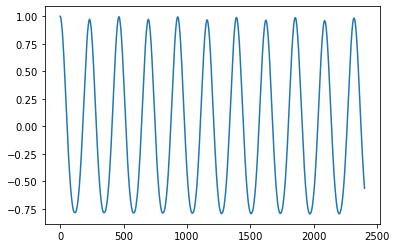

In [38]:
duration = 0.1
segment = wave.segment(start=3.1, duration=duration)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
plt.show()

In [39]:
freq = estimate_fundamental(segment,450,500)
freq

103.67170626349893

lag = 450 ~ 500 부근이 1에 가깝기 때문에 주기로 보고, low = 450, high = 500으로 지정해준다.  
103Hz는 G#2에 해당하므로 솔#이라는 것을 알 수 있다.

**(5) 다섯 번째 음계**

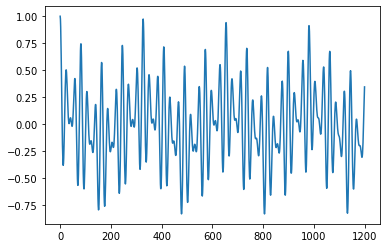

In [40]:
duration = 0.05
segment = wave.segment(start=3.7, duration=duration)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
plt.show()

In [41]:
freq = estimate_fundamental(segment,300,350)
freq

146.78899082568807

low = 300, high = 350으로 지정해준다. 
146Hz는 D3이므로 레라는 것을 알 수 있다.